# Model validation

   
Model Evaluation:
MSE.
RMSE.
MAE.
R2.
Adjusted R2.
Feature Importance.

Model Iteration (Wednesday and Thursday)
Rerun the model after adding the hot encoded categorical variables as well as other numeric categroical variables (e.g. number of open complaintes).


In [41]:
import seaborn as sns
import pandas as pd 
import numpy as np 
url = 'https://raw.githubusercontent.com/repicao/IH_AB_DA_FT_OCT_2023/main/Class_Materials/Case_Studies/Customer_Analysis_Case_Study/Data/Data_Marketing_Customer_Analysis_Round3.csv'
df = pd.read_csv(url)
df = df.dropna()
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


## adding the hot encoded categorical variables

In [21]:
df_numerical = df.select_dtypes(include='number')


df_categorical = df[['region','coverage','response','sales_channel',
                     'vehicle_class','vehicle_size','policy_type','gender']]

df_date = df[['effective_to_date']]
#df_numerical

In [5]:
df_categorical

,region,coverage,response,sales_channel,vehicle_class,vehicle_size,policy_type,gender
0,central,basic,no,agent,four-door car,medsize,corporate auto,m
1,west region,basic,no,call center,four-door car,medsize,personal auto,f
2,east,basic,no,call center,suv,medsize,personal auto,m
3,north west,extended,yes,branch,four-door car,medsize,corporate auto,m
4,north west,premium,no,branch,four-door car,medsize,personal auto,f
...,...,...,...,...,...,...,...,...
10684,central,premium,no,web,luxury car,medsize,personal auto,f
10685,north west,basic,no,branch,four-door car,medsize,personal auto,f
10686,central,extended,no,web,luxury suv,medsize,corporate auto,f
10687,west region,premium,no,branch,suv,medsize,personal auto,f


In [6]:
#one hot encoding
categorical = pd.get_dummies(df_categorical)
categorical

,region_central,region_east,region_north west,region_west region,coverage_basic,coverage_extended,coverage_premium,response_no,response_yes,sales_channel_agent,...,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small,policy_type_corporate auto,policy_type_personal auto,policy_type_special auto,gender_f,gender_m
0,1,0,0,0,1,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,0,1,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
3,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,0,0,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
10685,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
10686,1,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
10687,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0


# ordinal encoding

In [ ]:
df['vehicle_class'].unique()
df['coverage'].unique()
df['education'].unique()

In [27]:
from sklearn.preprocessing import OrdinalEncoder

#education
enc1 = OrdinalEncoder(categories = [['high school or below','college','bachelor','master','doctor']])
edu_enc = enc1.fit(df[['education']])
edu_enc = pd.DataFrame(enc1.transform(df[['education']]))
#edu_enc 

#coverage 
enc2 = OrdinalEncoder(categories = [['basic','extended','premium']])
cov_enc = enc2.fit(df[['coverage']])
cov_enc = pd.DataFrame(enc2.transform(df[['coverage']]))
#cov_enc

#vehicle class and
enc3 = OrdinalEncoder(categories = [['two-door car','four-door car','suv','sports car','luxury car','luxury suv']])
car_enc = enc3.fit(df[['vehicle_class']])
car_enc = pd.DataFrame(enc3.transform(df[['vehicle_class']]))
#car_enc

In [39]:
ordinal = pd.concat([car_enc,cov_enc,edu_enc],axis=1)
ordinal.columns = ['education', 'coverage','vehicle_class']
#ordinal.reset_index(drop=True,inplace=True)
ordinal

,education,coverage,vehicle_class
0,1.0,0.0,1.0
1,1.0,0.0,1.0
2,2.0,0.0,2.0
3,1.0,1.0,1.0
4,1.0,2.0,2.0
...,...,...,...
10684,4.0,2.0,2.0
10685,1.0,0.0,1.0
10686,5.0,1.0,2.0
10687,2.0,2.0,1.0


## Concat all the dfs

In [96]:
#we glue the categorical with the numerical in X 
data = pd.concat([ordinal, categorical,df_numerical],axis=1)
#new_X.reset_index(drop=True,inplace=True)
data.shape

(10689, 38)

## x-y split

In [64]:
y = pd.DataFrame(data['total_claim_amount'])
X = data
X.drop(columns=['total_claim_amount'],inplace=True) 
X


,education,coverage,vehicle_class,region_central,region_east,region_north west,region_west region,coverage_basic,coverage_extended,coverage_premium,...,policy_type_special auto,gender_f,gender_m,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,1.0,0.0,1.0,1,0,0,0,1,0,0,...,0,0,1,4809,48029,61,7,52,0,9
1,1.0,0.0,1.0,0,0,0,1,1,0,0,...,0,1,0,2228,92260,64,3,26,0,1
2,2.0,0.0,2.0,0,1,0,0,1,0,0,...,0,0,1,14947,22139,100,34,31,0,2
3,1.0,1.0,1.0,0,0,1,0,0,1,0,...,0,0,1,22332,49078,97,10,3,0,2
4,1.0,2.0,2.0,0,0,1,0,0,0,1,...,0,1,0,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,4.0,2.0,2.0,1,0,0,0,0,0,1,...,0,1,0,15563,61541,253,12,40,0,7
10685,1.0,0.0,1.0,0,0,1,0,1,0,0,...,0,1,0,5259,61146,65,7,68,0,6
10686,5.0,1.0,2.0,1,0,0,0,0,1,0,...,0,1,0,23893,39837,201,11,63,0,2
10687,2.0,2.0,1.0,0,0,0,1,0,0,1,...,0,1,0,11971,64195,158,0,27,4,6


## Train-test split

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 100)

In [66]:
y_train

,total_claim_amount
5869,886
5467,37
1322,326
9921,155
9140,699
...,...
350,246
79,89
8039,314
6936,64


In [67]:
X_train

,education,coverage,vehicle_class,region_central,region_east,region_north west,region_west region,coverage_basic,coverage_extended,coverage_premium,...,policy_type_special auto,gender_f,gender_m,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
5869,3.0,1.0,0.0,0,0,0,1,0,1,0,...,0,0,1,9486,25322,126,23,52,0,3
5467,1.0,2.0,1.0,0,0,0,1,0,0,1,...,0,1,0,7762,23827,106,18,77,2,3
1322,1.0,0.0,1.0,0,0,1,0,1,0,0,...,0,0,1,7806,23706,68,1,56,1,2
9921,0.0,2.0,2.0,1,0,0,0,0,0,1,...,0,1,0,8810,76266,110,24,88,1,3
9140,1.0,1.0,2.0,0,0,0,1,0,1,0,...,0,1,0,7996,70061,99,2,57,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.0,0.0,1.0,0,1,0,0,1,0,0,...,0,1,0,2476,47918,62,2,51,0,1
79,1.0,2.0,0.0,1,0,0,0,0,0,1,...,0,0,1,9312,75986,115,11,44,0,3
8039,0.0,0.0,0.0,0,0,1,0,1,0,0,...,0,1,0,6945,15850,61,28,14,0,2
6936,2.0,0.0,0.0,0,0,1,0,1,0,0,...,0,0,1,8718,89096,111,1,50,0,3


## Standardize the data (after the data split!).

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()

#fit and scale


X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled



#scaler.fit(X_train)
#scaler.trasnsform(X_test)

,education,coverage,vehicle_class,region_central,region_east,region_north west,region_west region,coverage_basic,coverage_extended,coverage_premium,...,policy_type_special auto,gender_f,gender_m,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,1.728680,0.811228,-1.193219,-0.637816,-0.311256,-0.623710,1.385720,-1.262939,1.533353,-0.308596,...,-0.203912,-1.017874,1.017874,0.208233,-1.080264,0.965738,0.775438,0.133066,-0.425585,0.006997
1,-0.234499,2.348535,-0.265224,-0.637816,-0.311256,-0.623710,1.385720,-1.262939,-0.652166,3.240481,...,-0.203912,0.982440,-0.982440,-0.039727,-1.140466,0.378281,0.281327,1.029148,1.753584,0.006997
2,-0.234499,-0.726078,-0.265224,-0.637816,-0.311256,1.603309,-0.721647,0.791804,-0.652166,-0.308596,...,-0.203912,-1.017874,1.017874,-0.033399,-1.145338,-0.737886,-1.398648,0.276439,0.664000,-0.408472
3,-1.216089,2.348535,0.662771,1.567850,-0.311256,-0.623710,-0.721647,-1.262939,-0.652166,3.240481,...,-0.203912,0.982440,-0.982440,0.111005,0.971172,0.495772,0.874260,1.423424,0.664000,0.006997
4,-0.234499,0.811228,0.662771,-0.637816,-0.311256,-0.623710,1.385720,-1.262939,1.533353,-0.308596,...,-0.203912,0.982440,-0.982440,-0.006071,0.721306,0.172672,-1.299826,0.312283,-0.425585,0.006997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8011,-1.216089,-0.726078,-0.265224,-0.637816,3.212792,-0.623710,-0.721647,0.791804,-0.652166,-0.308596,...,-0.203912,0.982440,-0.982440,-0.800005,-0.170358,-0.914123,-1.299826,0.097223,-0.425585,-0.823941
8012,-0.234499,2.348535,-1.193219,1.567850,-0.311256,-0.623710,-0.721647,-1.262939,-0.652166,3.240481,...,-0.203912,-1.017874,1.017874,0.183207,0.959897,0.642637,-0.410427,-0.153680,-0.425585,0.006997
8013,-1.216089,-0.726078,-1.193219,-0.637816,-0.311256,1.603309,-0.721647,0.791804,-0.652166,-0.308596,...,-0.203912,0.982440,-0.982440,-0.157235,-1.461687,-0.943495,1.269548,-1.228978,-0.425585,-0.408472
8014,0.747091,-0.726078,-1.193219,-0.637816,-0.311256,1.603309,-0.721647,0.791804,-0.652166,-0.308596,...,-0.203912,-1.017874,1.017874,0.097773,1.487817,0.525145,-1.398648,0.061380,-0.425585,0.006997


In [70]:
#we only scale the X_test, we dont fit them! 

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)
X_test_scaled


,education,coverage,vehicle_class,region_central,region_east,region_north west,region_west region,coverage_basic,coverage_extended,coverage_premium,...,policy_type_special auto,gender_f,gender_m,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.234499,-0.726078,-0.265224,1.567850,-0.311256,-0.623710,-0.721647,0.791804,-0.652166,-0.308596,...,-0.203912,0.982440,-0.982440,-0.769226,0.318581,-0.767258,0.874260,-1.300665,-0.425585,-0.823941
1,0.747091,0.811228,0.662771,-0.637816,-0.311256,-0.623710,1.385720,-1.262939,1.533353,-0.308596,...,-0.203912,-1.017874,1.017874,0.372485,1.559414,1.288838,0.281327,-0.727172,3.932754,0.006997
2,0.747091,0.811228,1.590765,-0.637816,-0.311256,1.603309,-0.721647,-1.262939,1.533353,-0.308596,...,4.904080,-1.017874,1.017874,0.175584,1.608380,0.995110,-0.410427,1.351738,-0.425585,0.006997
3,-0.234499,0.811228,0.662771,-0.637816,-0.311256,-0.623710,1.385720,-1.262939,1.533353,-0.308596,...,-0.203912,0.982440,-0.982440,0.194138,-0.746962,-0.385412,0.775438,-0.619642,-0.425585,-0.408472
4,1.728680,0.811228,0.662771,1.567850,-0.311256,-0.623710,-0.721647,-1.262939,1.533353,-0.308596,...,-0.203912,-1.017874,1.017874,0.290216,-1.451741,1.347584,-0.805715,-1.515724,-0.425585,1.668873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,-0.234499,-0.726078,0.662771,-0.637816,-0.311256,1.603309,-0.721647,0.791804,-0.652166,-0.308596,...,-0.203912,-1.017874,1.017874,-0.021173,-0.955432,-0.737886,-0.509249,0.527342,-0.425585,-0.408472
2669,-0.234499,2.348535,-0.265224,-0.637816,-0.311256,-0.623710,1.385720,-1.262939,-0.652166,3.240481,...,-0.203912,-1.017874,1.017874,-0.533347,0.335293,0.407654,-0.608071,-1.085605,-0.425585,-0.823941
2670,-0.234499,0.811228,1.590765,-0.637816,3.212792,-0.623710,-0.721647,-1.262939,1.533353,-0.308596,...,-0.203912,-1.017874,1.017874,-0.626979,0.348541,-0.032938,0.083683,0.061380,-0.425585,-0.823941
2671,-0.234499,0.811228,-1.193219,-0.637816,-0.311256,-0.623710,1.385720,-1.262939,1.533353,-0.308596,...,-0.203912,0.982440,-0.982440,-0.296174,0.223266,-0.502903,0.083683,0.276439,-0.425585,0.006997


#fit the y_train
y_fitted = scaler.fit(y_train)

#scale 
y_train_scaled = scaler.fit_transform(y_train)

y_train_scaled = pd.DataFrame(y_train_scaled,columns = y_train.columns)
y_train_scaled

## create new model

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lm = LinearRegression()

In [73]:
model = lm.fit(X_train_scaled, y_train)

In [74]:
model.coef_

array([[ 3.25070321e+14,  8.85324773e+14, -3.14472656e+01,
        -6.09738124e+13, -3.81628948e+13, -6.03891785e+13,
        -6.38179860e+13, -2.82337314e+15, -3.27717266e+15,
        -2.40156413e+15,  2.05209702e+15,  2.05209702e+15,
         8.27913535e+14,  7.68687422e+14,  6.75332620e+14,
         6.09724720e+14, -2.27762362e+14, -1.92697487e+14,
        -2.39995303e+14, -2.43437000e+14, -3.10138971e+14,
        -5.47328175e+13, -2.81903453e+14, -4.18631642e+14,
        -3.59594080e+14,  6.99936185e+14,  7.42795063e+14,
         3.34069670e+14, -2.08201895e+15, -2.08201895e+15,
        -8.43750000e+00, -3.16381836e+01,  1.85562500e+02,
         1.29577637e+00,  4.73632812e-02, -4.61376953e+00,
         3.58398438e+00]])

In [75]:
model.intercept_

array([435.48807688])

## Predict

## create the y_pred

In [76]:
y_pred = model.predict(X_test_scaled)

In [77]:
y_test.shape

(2673, 1)

In [78]:
np.array(y_test)

array([[320],
       [459],
       [ 22],
       ...,
       [213],
       [547],
       [307]])

## real_vs_pred

In [79]:
real_vs_pred = pd.DataFrame({'y_test': y_test["total_claim_amount"], 'y_pred':y_pred[:,0]})

In [80]:
real_vs_pred

,y_test,y_pred
9700,320,263.606477
4662,459,582.628646
1401,22,584.796340
6313,111,386.689610
8906,1000,684.359853
...,...,...
8832,453,324.585652
2498,513,558.696655
10126,213,397.260819
9257,547,355.713497


## Compute the MSE

In [81]:
from sklearn.metrics import mean_squared_error as mse

In [82]:
mse(real_vs_pred['y_test'], real_vs_pred['y_pred'])

47029.213440013664

## RMSE

In [83]:
import numpy as np 
np.sqrt(mse(real_vs_pred['y_test'], real_vs_pred['y_pred']))

216.86219919574197

In [84]:
y_test

,total_claim_amount
9700,320
4662,459
1401,22
6313,111
8906,1000
...,...
8832,453
2498,513
10126,213
9257,547


## Linear Regression using statsmodels

In [85]:
import statsmodels.api as sm 

In [86]:
X_train_const = sm.add_constant(X_train.to_numpy())

model_1 = sm.OLS(y_train, X_train_const).fit()
predictions_train = model_1.predict(X_train_const)

X_test_const = sm.add_constant(X_test)
y_pred = model_1.predict(X_test_const)
print_model = model_1.summary()
print_model #this is for the X_train

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     229.3
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:19:53   Log-Likelihood:                -54626.
No. Observations:                8016   AIC:                         1.093e+05
Df Residuals:                    7988   BIC:                         1.095e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7028      3.942      3.477      0.001       5.976      21.429
x1             5.4450      6.635      0.821      0.412      -7.560      18.450
x2             6.1637      5.307      1.161      0.245      -4.239      16.566
x3           -31.0395      2.295    -13.525      0.000     -35.538     -26.541
x4            -0.0578      4.380     -0.013      0.989      -8.643       8.528
x5             9.7833      6.700      1.460      0.144      -3.350      22.916
x6            -0.8432      4.437     -0.190      0.849      -9.541       7.855
x7             4.8206      4.187      1.151      0.250      -3.388      13.029
x8            11.9821      2.566      4.669      0.000       6.952      17.013
x9            -2.7222      4.400     -0.619      0.536     -11.347       5.903
x10            4.4430      3.696      1.202      0.229      -2.802      11.688
x11            3.9382      3.938      1.000      0.317      -3.781      11.658
x12            9.7646      4.416      2.211      0.027       1.109      18.421
x13            4.0064      3.949      1.015      0.310      -3.734      11.747
x14           -1.6184      4.287     -0.378      0.706     -10.021       6.784
x15            6.5146      4.900      1.330      0.184      -3.090      16.119
x16            4.8003      5.380      0.892      0.372      -5.745      15.346
x17            5.2816      4.246      1.244      0.214      -3.041      13.604
x18           53.0059     15.626      3.392      0.001      22.376      83.636
x19          -26.0510     11.416     -2.282      0.023     -48.430      -3.672
x20          -20.6199     11.859     -1.739      0.082     -43.867       2.627
x21           -9.8727      5.896     -1.675      0.094     -21.430       1.685
x22           11.9590      6.169      1.939      0.053      -0.134      24.051
x23           -6.6592      5.745     -1.159      0.246     -17.921       4.602
x24          -21.1946      3.804     -5.572      0.000     -28.651     -13.738
x25           41.5567      4.876      8.523      0.000      31.998      51.115
x26           -6.4179      5.562     -1.154      0.249     -17.322       4.486
x27            1.8078      4.793      0.377      0.706      -7.587      11.203
x28           18.3129      8.825      2.075      0.038       1.015      35.611
x29          -13.6473      3.137     -4.351      0.000     -19.796      -7.499
x30           27.3502      3.191      8.572      0.000      21.096      33.605
x31           -0.0010      0.000     -2.628      0.009      -0.002      -0.000
x32           -0.0013   9.98e-05    -12.993      0.000      -0.001      -0.001
x33            5.4548      0.211     25.842      0.000       5.041       5.869
x34            0.1730      0.245      0.707      0.480      -0.307       0.653
x35           -0.0557      0.089     -0.628      0.530      -0.230       0.118
x3

## Plots

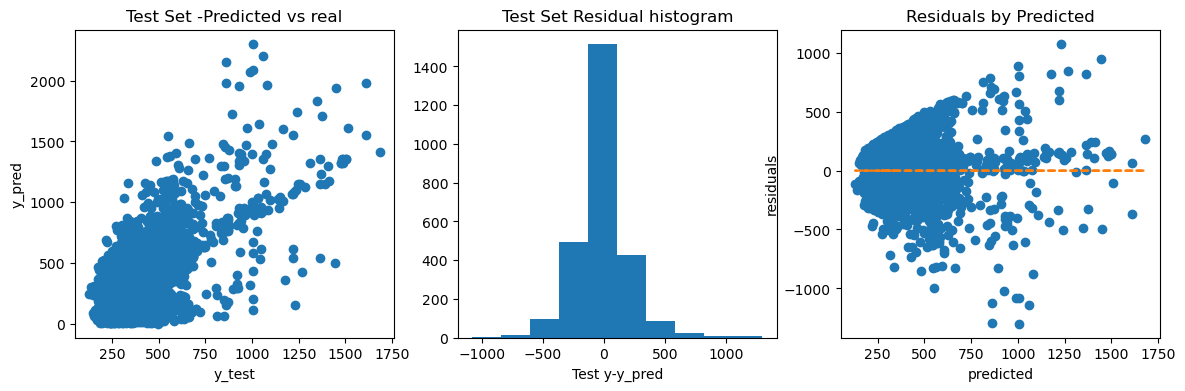

In [87]:
## Plot y_pred vs y_test
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test['total_claim_amount'], 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.
# Does it ressemble a normal distribution?
ax[1].hist(y_test['total_claim_amount'] - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

# Homoscedasticity
ax[2].plot(y_pred,np.array(y_pred)-np.array(y_test['total_claim_amount']),"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

## MAE 

In [88]:
from sklearn.metrics import mean_absolute_error as mae 

In [89]:
error = mae(y_test, y_pred) 
error

148.88580407427742

## R2

In [90]:
#we calculate not the X_test and we can compaire it with X_train
from sklearn.metrics import r2_score 

In [91]:
R_square = r2_score(y_test, y_pred)
R_square

0.4407787184509703

## Plot feature importances

In [97]:
coefficients = model.coef_.reshape(-1,1)
coefficients = coefficients.reshape(37,)
coefficients.shape

(37,)

In [93]:
np.array(coefficients)

array([[ 3.25070321e+14,  8.85324773e+14, -3.14472656e+01,
        -6.09738124e+13, -3.81628948e+13, -6.03891785e+13,
        -6.38179860e+13, -2.82337314e+15, -3.27717266e+15,
        -2.40156413e+15,  2.05209702e+15,  2.05209702e+15,
         8.27913535e+14,  7.68687422e+14,  6.75332620e+14,
         6.09724720e+14, -2.27762362e+14, -1.92697487e+14,
        -2.39995303e+14, -2.43437000e+14, -3.10138971e+14,
        -5.47328175e+13, -2.81903453e+14, -4.18631642e+14,
        -3.59594080e+14,  6.99936185e+14,  7.42795063e+14,
         3.34069670e+14, -2.08201895e+15, -2.08201895e+15,
        -8.43750000e+00, -3.16381836e+01,  1.85562500e+02,
         1.29577637e+00,  4.73632812e-02, -4.61376953e+00,
         3.58398438e+00]])

In [100]:
feature_importances = pd.DataFrame({'variable':X.columns, 'coefficient':coefficients })  
feature_importances
#[:,0]

,variable,coefficient
0,education,3.250703e+14
1,coverage,8.853248e+14
2,vehicle_class,-3.144727e+01
3,region_central,-6.097381e+13
4,region_east,-3.816289e+13
5,region_north west,-6.038918e+13
6,region_west region,-6.381799e+13
7,coverage_basic,-2.823373e+15
8,coverage_extended,-3.277173e+15
9,coverage_premium,-2.401564e+15


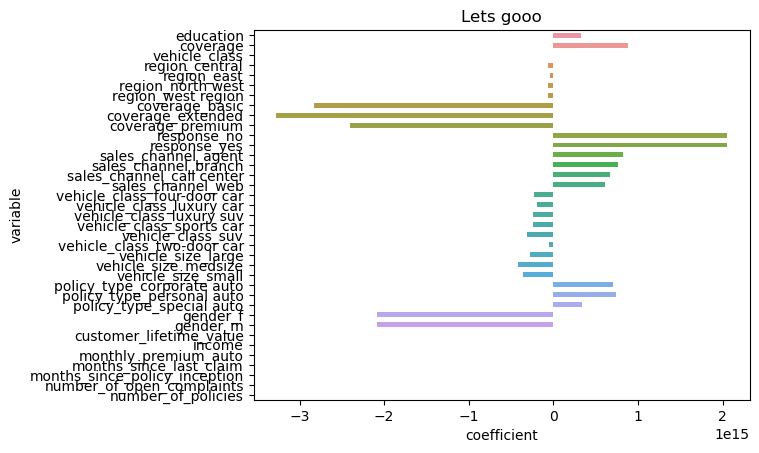

In [113]:
sns.barplot(y=feature_importances['variable'], x=feature_importances['coefficient'],width=0.5).set(title='Lets gooo')
#bar_plot = plt.xticks(rotation=90)
#g.set_yscale("log")
plt.show()
#for item in feature_importances.get_variable():
   # item.set_rotation(45)